In [197]:
import pandas as pd
import numpy as np

In [198]:
board_games = pd.read_csv('dump/app_boardgame.csv')

categories = pd.read_csv('dump/app_category.csv')
categories_fk = pd.read_csv('dump/app_boardgamecategory.csv')

mechanics = pd.read_csv('dump/app_mechanic.csv')
mechanics_fk = pd.read_csv('dump/app_boardgamemechanic.csv')

In [199]:
all_tables = [
    board_games,
    categories,
    categories_fk,
    mechanics,
    mechanics_fk,
]

for singular_table in all_tables:
    singular_table.drop(columns=['updated_at', 'created_at'], inplace=True)

board_games

,id,name,year_published,min_players,max_players,age,min_playtime,max_playtime,description,image_url,rating
0,123568,Warlike: Goblins vs Pirates vs Ninjas vs Robot...,2015.0,2,4,13,45,45,WARLIKE uses Deep hand and deck managing aspec...,https://cf.geekdo-images.com/U9OccIFIBtfuLBhx0...,0.00000
1,189940,Schrodinger Hero,2016.0,3,7,8,5,10,シュレディンガー勇者 (Schr&ouml;dinger Hero) is a partne...,https://cf.geekdo-images.com/ZMVhEIU46S8etVWJ9...,0.00000
2,341747,Castles in the Sky,2022.0,2,8,11,60,120,A Wargame of Flying Battleships<br/><br/>It is...,https://cf.geekdo-images.com/VmTBG7EusTC8NxS1N...,0.00000
3,123578,Bike Route,1979.0,2,6,0,0,0,Bike Route is a game of bike safety. In Bike R...,https://cf.geekdo-images.com/iUjl8dCZM8iowPmUi...,0.00000
4,123583,Haunted House: Save the Children!,2006.0,1,1,8,5,5,"A dirt, dead-end road with a church, a cemeter...",https://cf.geekdo-images.com/oip1QJPfS6Py387-4...,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
165690,341733,KLOAK: The Undercover Strategy Game,2019.0,2,4,7,10,20,"On your turn, move any piece on the board one ...",https://cf.geekdo-images.com/Mon8Nec3kEUJycQv2...,0.00000
165691,341737,A Wayfarer's Tale,2022.0,1,4,10,15,45,"In A Wayfarer's Tale, 1-4 players race to expl...",https://cf.geekdo-images.com/EKhDenKchG29XRZiK...,5.59707
165692,341742,Campus Wahala,2022.0,2,6,6,30,30,Campus Wahala is a Mancala based card game set...,https://cf.geekdo-images.com/Ft0kDunBpszSB2Yfv...,0.00000
165693,341744,Eclipse: Second Dawn for the Galaxy – Remnants...,2022.0,0,0,0,0,0,Eclipse: Second Dawn for the Galaxy &ndash; Re...,https://cf.geekdo-images.com/jTN64rx7LYgr1PFGK...,0.00000


In [200]:
board_games.drop(columns=['image_url', 'description', 'year_published'], inplace=True)

In [201]:
for index in categories_fk.index:
    cat_connection = categories.loc[categories['id'] == categories_fk.loc[index, 'category_id']]
    categories_fk.loc[index, 'category_id'] = cat_connection['name'].iloc[0]

categories_fk

C:\Users\mikol\AppData\Local\Temp\ipykernel_325376\957603277.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sports' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  categories_fk.loc[index, 'category_id'] = cat_connection['name'].iloc[0]


,id,board_game_id,category_id
0,1,341800,Sports
1,2,341638,Abstract Strategy
2,3,341638,Mythology
3,4,341638,Puzzle
4,5,341647,Card Game
...,...,...,...
411161,411214,341620,Music
411162,411215,341620,Party Game
411163,411216,341623,Exploration
411164,411217,341624,Horror


In [202]:
for index in mechanics_fk.index:
    mech_connection = mechanics.loc[mechanics['id'] == mechanics_fk.loc[index, 'mechanic_id']]
    mechanics_fk.loc[index, 'mechanic_id'] = mech_connection['name'].iloc[0]

mechanics_fk

C:\Users\mikol\AppData\Local\Temp\ipykernel_325376\2589249496.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Race' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mechanics_fk.loc[index, 'mechanic_id'] = mech_connection['name'].iloc[0]


,id,board_game_id,mechanic_id
0,1,349026,Race
1,2,349026,Simultaneous Action Selection
2,3,349026,Storytelling
3,4,349026,Targeted Clues
4,5,349026,Voting
...,...,...,...
364678,364733,348922,Team-Based Game
364679,364734,348925,Cooperative Game
364680,364735,348925,Deck Construction
364681,364736,348925,Scenario / Mission / Campaign Game


In [203]:
all_categories = [cat for cat in categories['name']]
all_categories

all_mechanics = [mech for mech in mechanics['name']]
all_mechanics

['Race',
 'Simultaneous Action Selection',
 'Storytelling',
 'Targeted Clues',
 'Voting',
 'Square Grid',
 'Team-Based Game',
 'Trick-taking',
 'Deck, Bag, and Pool Building',
 'Acting',
 'Action/Event',
 'Scenario / Mission / Campaign Game',
 'Dice Rolling',
 'Network and Route Building',
 'Stock Holding',
 'Tile Placement',
 'Action Points',
 'Hexagon Grid',
 'Rock-Paper-Scissors',
 'Stacking and Balancing',
 'Cooperative Game',
 'Grid Movement',
 'Map Addition',
 'Pick-up and Deliver',
 'Point to Point Movement',
 'Alliances',
 'Catch the Leader',
 'Modular Board',
 'Negotiation',
 'Once-Per-Game Abilities',
 'Player Elimination',
 'End Game Bonuses',
 'Hand Management',
 'Market',
 'Move Through Deck',
 'Solo / Solitaire Game',
 'Variable Player Powers',
 'Variable Set-up',
 'Take That',
 'Area Movement',
 'Matching',
 'Memory',
 'Set Collection',
 'Line of Sight',
 'Player Judge',
 'Deduction',
 'Roll / Spin and Move',
 'Ratio / Combat Results Table',
 'Simulation',
 'Zone of Cont

In [204]:
for category in all_categories:
    board_games[category] = 0

for mechanic in all_mechanics:
    board_games[mechanic] = 0

column_max_vals = [
    {'column': 'min_players', 'max_value': board_games['min_players'].max()},
    {'column': 'max_players', 'max_value': board_games['max_players'].max()},
    {'column': 'age', 'max_value': board_games['age'].max()},
    {'column': 'min_playtime', 'max_value': board_games['min_playtime'].max()},
    {'column': 'max_playtime', 'max_value': board_games['max_playtime'].max()},
    {'column': 'rating', 'max_value': board_games['rating'].max()}
]

for index in board_games.index:
    for element in column_max_vals:
        board_games.loc[index, element['column']] = board_games.loc[index, element['column']] / element['max_value']

board_games

C:\Users\mikol\AppData\Local\Temp\ipykernel_325376\876990320.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  board_games[mechanic] = 0
C:\Users\mikol\AppData\Local\Temp\ipykernel_325376\876990320.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  board_games[mechanic] = 0
C:\Users\mikol\AppData\Local\Temp\ipykernel_325376\876990320.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

,id,name,min_players,max_players,age,min_playtime,max_playtime,rating,Sports,Abstract Strategy,...,Auction: Multiple Lot,Follow,Auction: Fixed Placement,Prisoners Dilemma,Crayon Rail System,Auction: Dutch,Auction: Dutch Priority,Auction: English,Passed Action Token,Auction Compensation
0,123568,Warlike: Goblins vs Pirates vs Ninjas vs Robot...,0.000988,0.000354,0.072222,0.000285,7.134703e-07,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,189940,Schrodinger Hero,0.001482,0.000620,0.044444,0.000032,1.585490e-07,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,341747,Castles in the Sky,0.000988,0.000708,0.061111,0.000381,1.902588e-06,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,123578,Bike Route,0.000988,0.000531,0.000000,0.000000,0.000000e+00,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123583,Haunted House: Save the Children!,0.000494,0.000089,0.044444,0.000032,7.927448e-08,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165690,341733,KLOAK: The Undercover Strategy Game,0.000988,0.000354,0.038889,0.000063,3.170979e-07,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
165691,341737,A Wayfarer's Tale,0.000494,0.000354,0.055556,0.000095,7.134703e-07,0.66511,0,0,...,0,0,0,0,0,0,0,0,0,0
165692,341742,Campus Wahala,0.000988,0.000531,0.033333,0.000190,4.756469e-07,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
165693,341744,Eclipse: Second Dawn for the Galaxy – Remnants...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
for _, row in categories_fk.iterrows():
    board_game_id = row['board_game_id']
    category_name = row['category_id']

    board_games.loc[board_games['id'] == board_game_id, category_name] = 1

for _, row in mechanics_fk.iterrows():
    board_game_id = row['board_game_id']
    mechanic_name = row['mechanic_id']

    board_games.loc[board_games['id'] == board_game_id, mechanic_name] = 1

In [206]:
board_games.drop(columns=['id', 'name'], inplace=True)

In [207]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [212]:
recommendation_model = KMeans(n_clusters=5, verbose=1, random_state=1)

clusters = pd.DataFrame()
clusters['clusters'] = recommendation_model.fit_predict(board_games)

Initialization complete
Iteration 0, inertia 767706.5359186935.
Iteration 1, inertia 672341.7311944106.
Iteration 2, inertia 642708.4920815816.
Iteration 3, inertia 627261.2078209225.
Iteration 4, inertia 622652.5523194596.
Iteration 5, inertia 619431.1191159708.
Iteration 6, inertia 618335.5932791795.
Iteration 7, inertia 617654.4873978498.
Iteration 8, inertia 617054.9893543215.
Iteration 9, inertia 616907.1293489374.
Iteration 10, inertia 616875.6799673942.
Iteration 11, inertia 616865.2642119532.
Iteration 12, inertia 616862.5254502227.
Iteration 13, inertia 616861.7661780939.
Iteration 14, inertia 616861.5306494677.
Iteration 15, inertia 616861.4366233688.
Iteration 16, inertia 616861.4012334468.
Converged at iteration 16: center shift 1.5918454120865106e-07 within tolerance 1.567934395116579e-06.


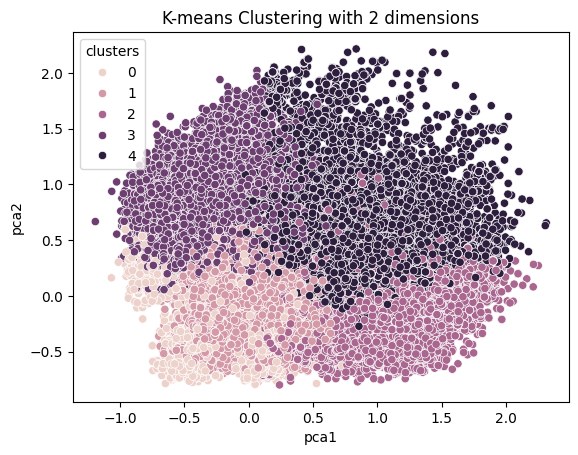

In [213]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(board_games)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=clusters['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [238]:
selected_game = board_games.loc[56454]
selected_game = pd.DataFrame(selected_game).T
recommendation_model.predict(selected_game)

array([3], dtype=int32)

In [239]:
import pickle

filename = 'recommendation_model.sav'
pickle.dump(recommendation_model, open(filename, 'wb'))